## Constants and Geometry 

In [4]:
import numpy as np
from matplotlib import pyplot as plt, cm
from heat_equation import *

lx = 5      #length in the x direction
ly = 5     #length in the y direction
nx = 51     #grid points in x direction
ny = 51     #grid points in y direction
tf = 3      #final time to calculate to

dx = lx / (nx - 1)
dy = ly / (ny - 1)
x = np.linspace(0, lx, nx)
y = np.linspace(0, ly, ny)
X, Y = np.meshgrid(x, y)

alpha = 1
#nu = 0.5
dt = 0.001 #time step size
ds = 100   #number of steps after which the state of domain should be saved

nt=int(tf/dt) # number of time steps

## Initial and boundary conditions

In [5]:
T = np.ones((nx,ny))*300 #initial condition

#Boundary conditions
TLeft=['D',300]
TRight=['D',100]
TTop=['D',100]
TBottom=['D',300]

TBCs=[TLeft,TRight,TTop,TBottom]

#solving the equation for the given geometry
T=heat_equation(T,dx,dy,alpha,dt,ds,nt,TBCs)

## Plotting and visualization

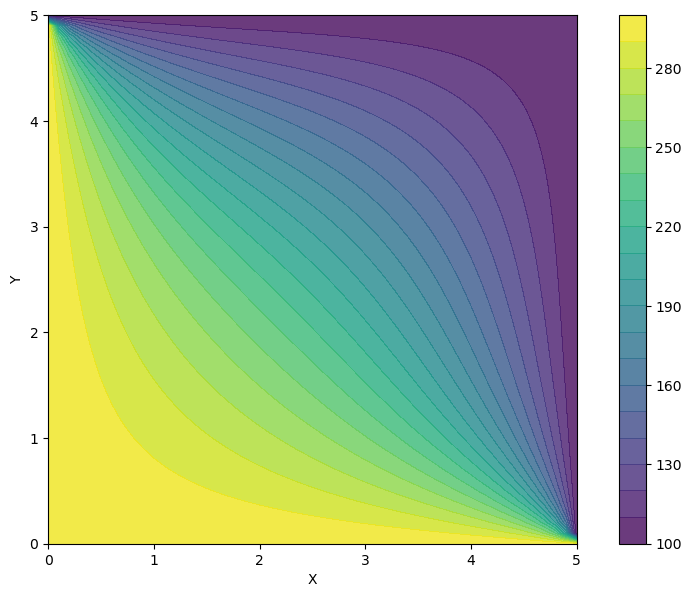

In [6]:
fig = plt.figure(figsize=(11,7),dpi=100)
# plotting the temperature field
plt.contourf(X, Y, T, 20, alpha=0.8, cmap=cm.viridis)  
plt.colorbar()
#plt.contour(X, Y, T,10, colors='black')

plt.xlabel('X')
plt.ylabel('Y')
ax = plt.gca()
ax.set_aspect(1)
plt.show()